In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('train.csv')
df.head()

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [48]:
df.shape

(75000, 4)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [50]:
df.describe()

,sample_id,price
count,75000.000000,75000.000000
mean,149841.917707,23.647654
std,86585.346513,33.376932
min,0.000000,0.130000
25%,73845.750000,6.795000
50%,150129.000000,14.000000
75%,225040.250000,28.625000
max,299438.000000,2796.000000


In [51]:
df.isnull().sum()

sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64

In [52]:
df = df.copy()

In [53]:
df["char_len"] = df["catalog_content"].str.len()

df["char_len"].describe()


count    75000.000000
mean       908.886547
std        852.896151
min         32.000000
25%        251.000000
50%        643.000000
75%       1280.000000
max       7894.000000
Name: char_len, dtype: float64

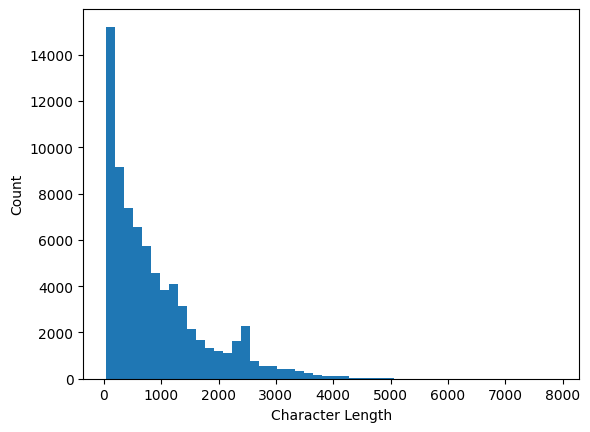

In [54]:
plt.hist(df["char_len"], bins=50)
plt.xlabel("Character Length")
plt.ylabel("Count")
plt.show()


In [55]:
print(df['catalog_content'][74900])

Item Name: Generic T.rue Made Foods Barbeque Sauce Carolina Red Style 18 oz (Pack of 6)
Bullet Point 1: Versatile Usage: Perfect for marinating, dipping, drizzling, or cooking, making it a must-have addition to your kitchen pantry.
Bullet Point 2: Enhances Flavors: Expertly crafted to complement and elevate the taste of your favorite dishes, from salads and sandwiches to grilled meats and vegetables.
Bullet Point 3: Ideal for Sharing: Conveniently packaged for sharing, making it easy to enjoy these snacks with friends and family during gatherings, parties, or any casual get-together.
Bullet Point 4: Consistent Quality: Produced under stringent quality control measures, ensuring a consistently delicious product that meets high standards and exceeds your expectations every time.
Bullet Point 5: Rich and Balanced Taste: Offers a harmonious blend of flavors that add depth and complexity to your meals, satisfying even the most discerning palate.
Product Description: Enjoy the rich and tangy

In [56]:
df["word_count"] = df["catalog_content"].str.split().str.len()

df["word_count"].describe()


count    75000.000000
mean       147.851693
std        137.068731
min          7.000000
25%         42.000000
50%        104.000000
75%        208.000000
max       1333.000000
Name: word_count, dtype: float64

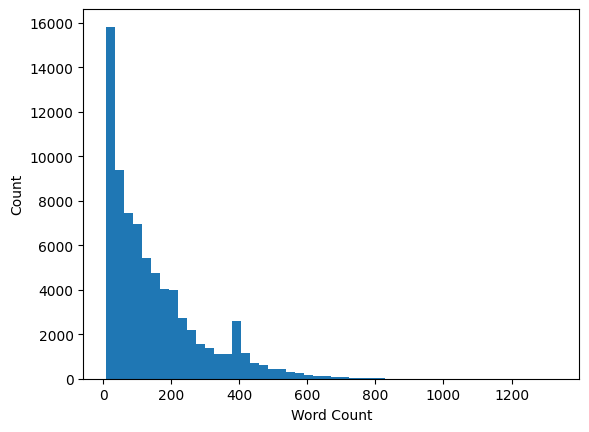

In [57]:
plt.hist(df["word_count"], bins=50)
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.show()


In [58]:
(df["word_count"] < 10).mean()


0.00256

In [59]:
print(df["catalog_content"].value_counts().head(10))


catalog_content
Item Name: PAPYRUS Everyday Card, 1 EA\nValue: 1.0\nUnit: Count\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [60]:
df["has_numbers"] = df["catalog_content"].str.contains(r"\d", regex=True)
df["has_units"] = df["catalog_content"].str.contains(
    r"(kg|gm|gb|mb|inch|cm|mm|l|ml)", 
    case=False, regex=True
)

df[["has_numbers", "has_units"]].mean()


C:\Users\mayan\AppData\Local\Temp\ipykernel_24980\1980478550.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["has_units"] = df["catalog_content"].str.contains(


has_numbers    0.9984
has_units      1.0000
dtype: float64

In [61]:
df["price"].describe()


count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64

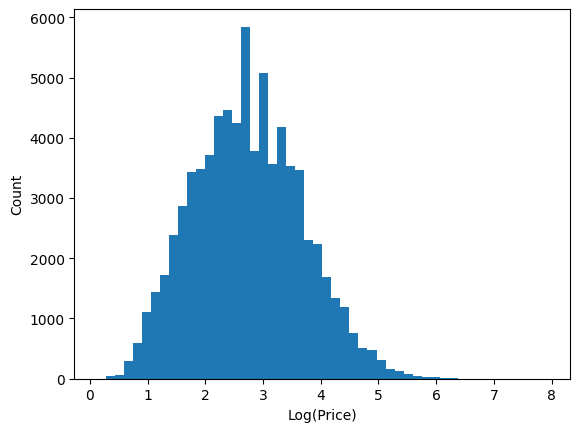

In [62]:
plt.hist(np.log1p(df["price"]), bins=50)
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.show()


In [63]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df["price_outlier"] = (df["price"] < lower) | (df["price"] > upper)

df["price_outlier"].mean()


0.07365333333333333

In [64]:
df.groupby(pd.qcut(df["price"], 5))["word_count"].mean()


C:\Users\mayan\AppData\Local\Temp\ipykernel_24980\2972853974.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df["price"], 5))["word_count"].mean()


price
(0.129, 5.6]         89.308231
(5.6, 10.78]        121.283323
(10.78, 18.45]      162.446133
(18.45, 33.891]     176.115749
(33.891, 2796.0]    190.123000
Name: word_count, dtype: float64

In [65]:
df.head()

,sample_id,catalog_content,image_link,price,char_len,word_count,has_numbers,has_units,price_outlier
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,91,18,True,True,False
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,511,80,True,True,False
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,328,59,True,True,False
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,1318,211,True,True,False
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,155,28,True,True,True


In [66]:
low_wc = df["word_count"].quantile(0.25)   # ~42
high_wc = df["word_count"].quantile(0.75)  # ~208

def text_score(wc):
    if wc < low_wc:
        return 0
    elif wc <= high_wc:
        return 1
    else:
        return 2

df["text_score"] = df["word_count"].apply(text_score)


In [71]:
df["price_sanity_score"] = (~df["price_outlier"]).astype(int)
df['price_sanity_score'].unique()


array([1, 0])

In [69]:
df.head()

,sample_id,catalog_content,image_link,price,char_len,word_count,has_numbers,has_units,price_outlier,text_score,price_sanity_score
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,91,18,True,True,False,0,1
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,511,80,True,True,False,1,1
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,328,59,True,True,False,1,1
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,1318,211,True,True,False,2,1
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,155,28,True,True,True,0,0


In [72]:
df["price_bin"] = pd.qcut(df["price"], q=5, duplicates="drop")
bin_mean_wc = df.groupby("price_bin")["word_count"].mean()

def consistency_score(row):
    mean_wc = bin_mean_wc[row["price_bin"]]
    if row["word_count"] < mean_wc * 0.9:
        return 0
    elif row["word_count"] <= mean_wc * 1.1:
        return 1
    else:
        return 2

df["consistency_score"] = df.apply(consistency_score, axis=1)


C:\Users\mayan\AppData\Local\Temp\ipykernel_24980\116718597.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_mean_wc = df.groupby("price_bin")["word_count"].mean()


In [74]:
df["final_score"] = (
    df["text_score"] * 0.5 +
    df["price_sanity_score"] * 0.2 +
    df["consistency_score"] * 0.3
)
df["final_score"].describe()

count    75000.000000
mean         0.924329
std          0.594919
min          0.000000
25%          0.500000
50%          0.700000
75%          1.300000
max          1.800000
Name: final_score, dtype: float64

In [75]:
def quality_label(score):
    if score <= 0.8:
        return 0   # Low
    elif score <= 1.6:
        return 1   # Medium
    else:
        return 2   # High

df["quality_label"] = df["final_score"].apply(quality_label)


In [79]:
df['quality_label'].value_counts(normalize=True)

quality_label
0    0.568720
2    0.223107
1    0.208173
Name: proportion, dtype: float64

In [80]:
df.to_csv("train_with_quality_label.csv", index=False)
